# Importy

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk 

plt.style.use('ggplot')


# Pobieranie danych

In [2]:
import kagglehub
kagglehub.dataset_download('mohamedbakhet/amazon-books-reviews')


'C:\\Users\\aleks\\.cache\\kagglehub\\datasets\\mohamedbakhet\\amazon-books-reviews\\versions\\1'

In [3]:
import os
folder_path = 'C:\\Users\\aleks\\.cache\\kagglehub\\datasets\\mohamedbakhet\\amazon-books-reviews\\versions\\1'
files = os.listdir(folder_path)
print(files)


['books_data.csv', 'Books_rating.csv']


In [4]:
data1_path = os.path.join(folder_path, 'books_data.csv')
data2_path = os.path.join(folder_path, 'Books_rating.csv')

In [5]:
df2 = pd.read_csv(data1_path)
df2.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [6]:
df = pd.read_csv(data2_path)
df.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [7]:
df['review/text'].values[1]

"I don't care much for Dr. Seuss but after reading Philip Nel's book I changed my mind--that's a good testimonial to the power of Rel's writing and thinking. Rel plays Dr. Seuss the ultimate compliment of treating him as a serious poet as well as one of the 20th century's most interesting visual artists, and after reading his book I decided that a trip to the Mandeville Collections of the library at University of California in San Diego was in order, so I could visit some of the incredible Seuss/Geisel holdings they have there.There's almost too much to take in, for, like William Butler Yeats, Seuss led a career that constantly shifted and metamoprhized itself to meet new historical and political cirsumstances, so he seems to have been both a leftist and a conservative at different junctures of his career, both in politics and in art. As Nel shows us, he was once a cartoonist for the fabled PM magazine and, like Andy Warhol, he served his time slaving in the ad business too. All was in

In [8]:
df.shape

(3000000, 10)

# EDA

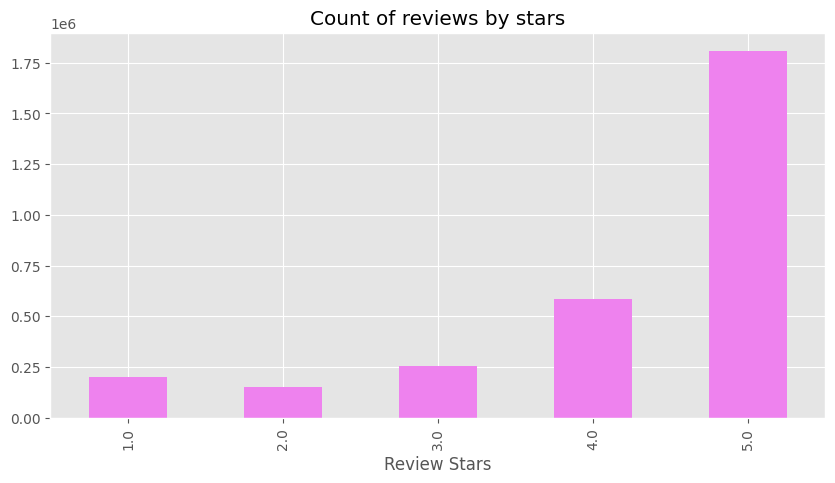

In [9]:
ax = df['review/score'].value_counts().sort_index() \
    .plot(kind='bar', 
          title='Count of reviews by stars', 
          figsize=(10,5),
          color='violet')
ax.set_xlabel('Review Stars')
plt.show()

Opinion by author or category 

In [10]:
df_all = df.merge(df2, how='inner', on='Title')

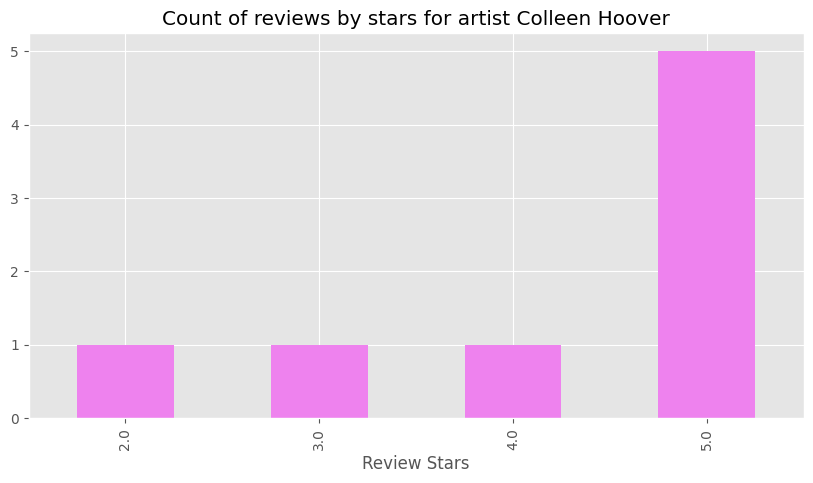

In [11]:
def show_plot_of_stars(df, artist):
    filter = df_all['authors'] == f"['{artist}']"
    df =df[filter]
    ax = df['review/score'].value_counts().sort_index() \
    .plot(kind='bar', 
          title=f'Count of reviews by stars for artist {artist}', 
          figsize=(10,5),
          color='violet')
    ax.set_xlabel('Review Stars')
    plt.show()

show_plot_of_stars(df_all, 'Colleen Hoover')

# Basic NLTK

In [12]:
example = df['review/text'][40]
example

'It has been years since I\'ve read a romance novel. If this is typical of the genre these days, I will never pick up another one. Not only is the plot contrived and juvenile, the writing shows the lack of skill expected only in a child\'s writing. Many of my seventh grade writing students would be embarrassed if this trash was attributed to them. "The bed squeaked slightly, but her husband was unmoved by the sharp squeaks from the bed as well as the howling noises caused by the wind that were surrounding him." Were the squeaks slight or sharp, and were she and her husband sleeping outside that the wind could be howling around him not the house? This is just one mangled sentence in a book filled with such tripe. If my criticism seems harsh, it\'s because I actually paid money for this book. What a waste!I would suggest that Miss Haddon go back to Junior High School and begin a serious course of writing instruction. Perhaps by the time she graduates from college she will have gained an 

Tokenizing

In [13]:
# nltk.download()

tokens = nltk.word_tokenize(example)
tokens[:10]

['It', 'has', 'been', 'years', 'since', 'I', "'ve", 'read', 'a', 'romance']

POS

In [14]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('It', 'PRP'),
 ('has', 'VBZ'),
 ('been', 'VBN'),
 ('years', 'NNS'),
 ('since', 'IN'),
 ('I', 'PRP'),
 ("'ve", 'VBP'),
 ('read', 'VBN'),
 ('a', 'DT'),
 ('romance', 'NN')]

Named entity

In [15]:
entites = nltk.chunk.ne_chunk(tagged)
entites.pprint()

(S
  It/PRP
  has/VBZ
  been/VBN
  years/NNS
  since/IN
  I/PRP
  've/VBP
  read/VBN
  a/DT
  romance/NN
  novel/NN
  ./.
  If/IN
  this/DT
  is/VBZ
  typical/JJ
  of/IN
  the/DT
  genre/NN
  these/DT
  days/NNS
  ,/,
  I/PRP
  will/MD
  never/RB
  pick/VB
  up/RP
  another/DT
  one/NN
  ./.
  Not/RB
  only/RB
  is/VBZ
  the/DT
  plot/NN
  contrived/VBD
  and/CC
  juvenile/NN
  ,/,
  the/DT
  writing/NN
  shows/VBZ
  the/DT
  lack/NN
  of/IN
  skill/NN
  expected/VBN
  only/RB
  in/IN
  a/DT
  child/NN
  's/POS
  writing/NN
  ./.
  Many/JJ
  of/IN
  my/PRP$
  seventh/JJ
  grade/NN
  writing/NN
  students/NNS
  would/MD
  be/VB
  embarrassed/VBN
  if/IN
  this/DT
  trash/NN
  was/VBD
  attributed/VBN
  to/TO
  them/PRP
  ./.
  ``/``
  The/DT
  bed/NN
  squeaked/VBD
  slightly/RB
  ,/,
  but/CC
  her/PRP$
  husband/NN
  was/VBD
  unmoved/VBN
  by/IN
  the/DT
  sharp/JJ
  squeaks/NN
  from/IN
  the/DT
  bed/NN
  as/RB
  well/RB
  as/IN
  the/DT
  howling/NN
  noises/NNS
  caused/VBN
  by/

## VADER Sentiment Scoring 

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [17]:
sia.polarity_scores('i dont like this!')

{'neg': 0.546, 'neu': 0.454, 'pos': 0.0, 'compound': -0.3404}

In [18]:
sia.polarity_scores(example)

{'neg': 0.062, 'neu': 0.826, 'pos': 0.112, 'compound': 0.907}

In [19]:
df[df['review/text'].isna()]


,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
469860,B000GQK706,The Lord of the Rings - Boxed Set,NaN,NaN,NaN,0/1,5.0,938563200,have only one word to say read ths book,NaN
1139849,B000I1VJLA,The Lord of the Rings Box Set,NaN,NaN,NaN,0/1,5.0,938563200,have only one word to say read ths book,NaN
1368032,B000J1OR0Y,The Lord of the Rings (3 Volume Set),NaN,NaN,NaN,0/1,5.0,938563200,have only one word to say read ths book,NaN
1598329,B000PIIMPW,The Lord of the Rings Trilogy (The Fellowship ...,NaN,NaN,NaN,0/1,5.0,938563200,have only one word to say read ths book,NaN
1771566,1562802372,The Drive,NaN,A32VJTCIVOG88D,Fire,1/1,5.0,1136678400,Beautiful and Honest - read it 4 times so far,NaN
1923523,B000BI4160,The Lord of the Rings Trilogy: Three Volumes i...,NaN,NaN,NaN,0/1,5.0,938563200,have only one word to say read ths book,NaN
2584461,B000H7EO2G,The Lord of the Rings Trilogy 3 Volumes,NaN,NaN,NaN,0/1,5.0,938563200,have only one word to say read ths book,NaN
2895564,B000FAIRN2,The Lord Of The Rings THREE VOLUME BOXED SET (...,NaN,NaN,NaN,0/1,5.0,938563200,have only one word to say read ths book,NaN


In [20]:
df = df.head(5000)

In [21]:
df['review/text'] = df['review/text'].fillna('').astype(str)

res = {}
for _, row in df.iterrows():
    text = row['review/text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)


In [22]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders

,Id,neg,neu,pos,compound
0,1882931173,0.013,0.781,0.206,0.9408
1,0826414346,0.055,0.785,0.161,0.9802
2,0829814000,0.000,0.776,0.224,0.9940
3,0595344550,0.153,0.726,0.120,-0.9353
4,0253338352,0.000,0.937,0.063,0.9118
...,...,...,...,...,...
446,0720712785,0.000,0.867,0.133,0.8860
447,0192854496,0.079,0.865,0.056,-0.5236
448,0971320403,0.000,0.858,0.142,0.8687
449,0936783427,0.056,0.837,0.107,0.9708


In [23]:
vaders = vaders.merge(df, how='left', on='Id', )
vaders.head()

,Id,neg,neu,pos,compound,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,0.013,0.781,0.206,0.9408,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,0.055,0.785,0.161,0.9802,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,0.055,0.785,0.161,0.9802,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,0.055,0.785,0.161,0.9802,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,0.055,0.785,0.161,0.9802,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


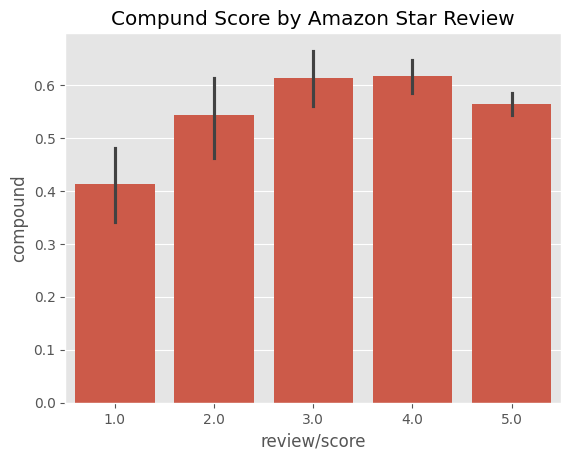

In [24]:
ax = sns.barplot(data=vaders, x='review/score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

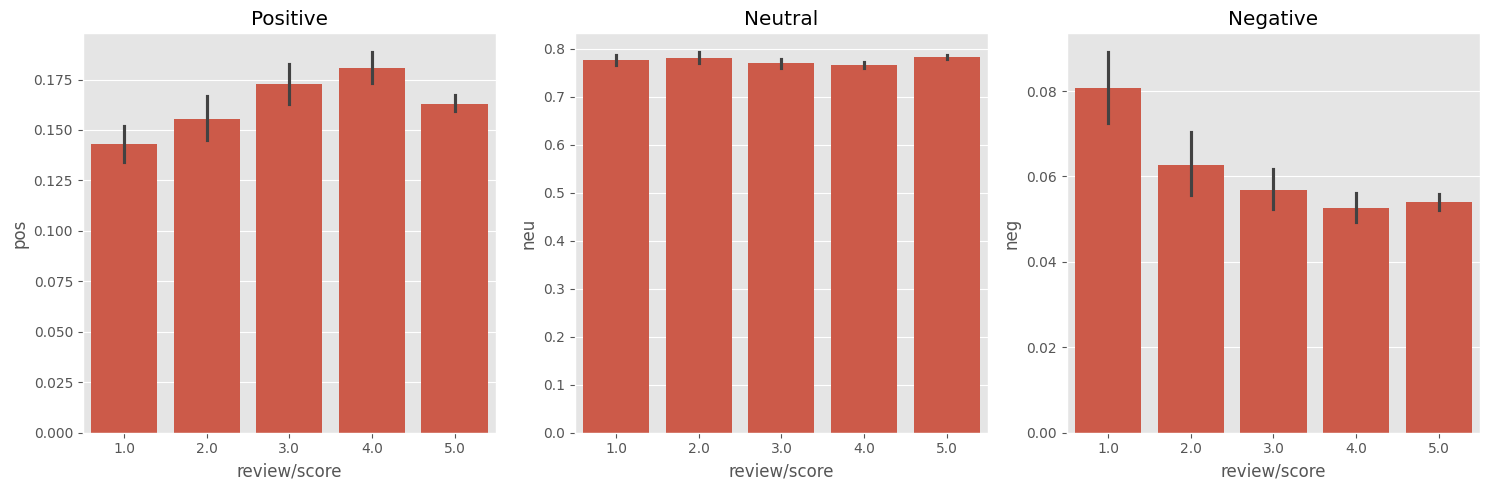

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(data=vaders, x='review/score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='review/score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='review/score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()



In [26]:
vaders['sentiment'] = vaders[['neg', 'neu', 'pos']].idxmax(axis=1)

In [27]:
grouped = vaders.groupby('sentiment').size().reset_index(name='count')

In [28]:
grouped

,sentiment,count
0,neu,4860
1,pos,140


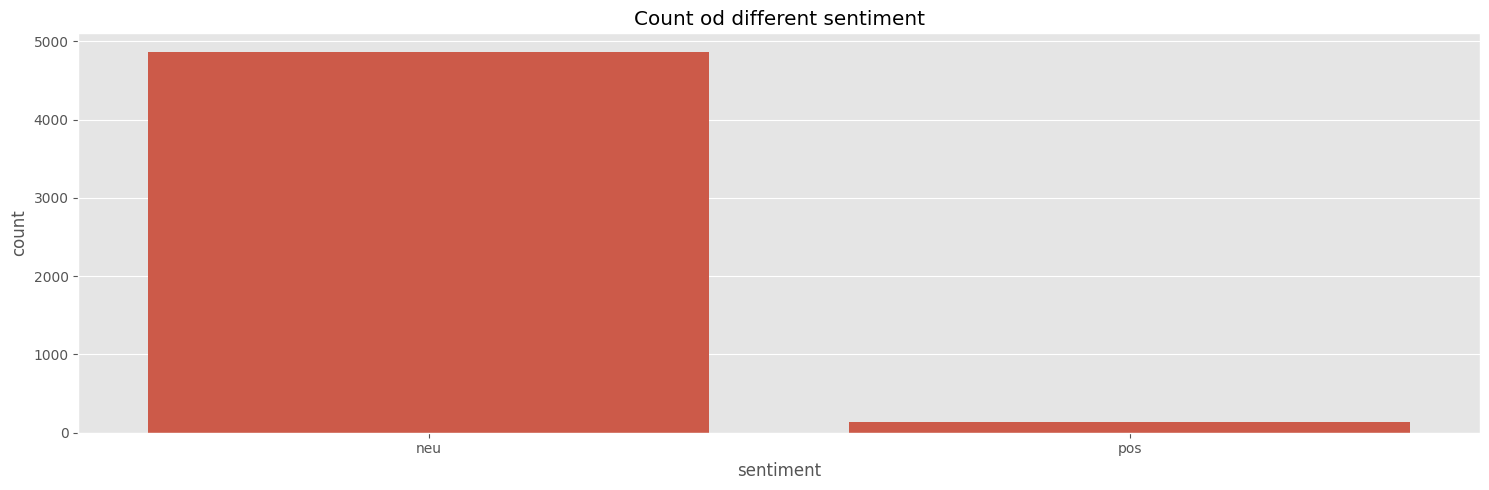

In [29]:
plt.figure(figsize=(15,5))
sns.barplot(data=grouped, x='sentiment', y='count')
plt.title('Count od different sentiment')
plt.tight_layout()


# Roberta Pretrained Model

In [30]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [31]:
import torch
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [32]:
print(example)

It has been years since I've read a romance novel. If this is typical of the genre these days, I will never pick up another one. Not only is the plot contrived and juvenile, the writing shows the lack of skill expected only in a child's writing. Many of my seventh grade writing students would be embarrassed if this trash was attributed to them. "The bed squeaked slightly, but her husband was unmoved by the sharp squeaks from the bed as well as the howling noises caused by the wind that were surrounding him." Were the squeaks slight or sharp, and were she and her husband sleeping outside that the wind could be howling around him not the house? This is just one mangled sentence in a book filled with such tripe. If my criticism seems harsh, it's because I actually paid money for this book. What a waste!I would suggest that Miss Haddon go back to Junior High School and begin a serious course of writing instruction. Perhaps by the time she graduates from college she will have gained an unde

In [33]:
sia.polarity_scores(example)

{'neg': 0.062, 'neu': 0.826, 'pos': 0.112, 'compound': 0.907}

In [34]:
def popularity_score_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt', padding=True, truncation=True, max_length=512)
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dct = {
        'roberta_neg': float(scores[0]),
        'roberta_neu': float(scores[1]),
        'roberta_pos': float(scores[2])
    }
    return scores_dct

In [35]:
res = {}
for i, row in df.iterrows():
    try:
        text = row['review/text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = popularity_score_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

In [36]:
res

{'1882931173': {'vader_neg': 0.013,
  'vader_neu': 0.781,
  'vader_pos': 0.206,
  'vader_compound': 0.9408,
  'roberta_neg': 0.029945550486445427,
  'roberta_neu': 0.28565800189971924,
  'roberta_pos': 0.6843964457511902},
 '0826414346': {'vader_neg': 0.055,
  'vader_neu': 0.785,
  'vader_pos': 0.161,
  'vader_compound': 0.9802,
  'roberta_neg': 0.0195847749710083,
  'roberta_neu': 0.16410481929779053,
  'roberta_pos': 0.8163104057312012},
 '0829814000': {'vader_neg': 0.0,
  'vader_neu': 0.776,
  'vader_pos': 0.224,
  'vader_compound': 0.994,
  'roberta_neg': 0.006509743630886078,
  'roberta_neu': 0.17055007815361023,
  'roberta_pos': 0.8229401707649231},
 '0595344550': {'vader_neg': 0.153,
  'vader_neu': 0.726,
  'vader_pos': 0.12,
  'vader_compound': -0.9353,
  'roberta_neg': 0.6516083478927612,
  'roberta_neu': 0.28976956009864807,
  'roberta_pos': 0.058622073382139206},
 '0253338352': {'vader_neg': 0.0,
  'vader_neu': 0.937,
  'vader_pos': 0.063,
  'vader_compound': 0.9118,
  'robe

In [37]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

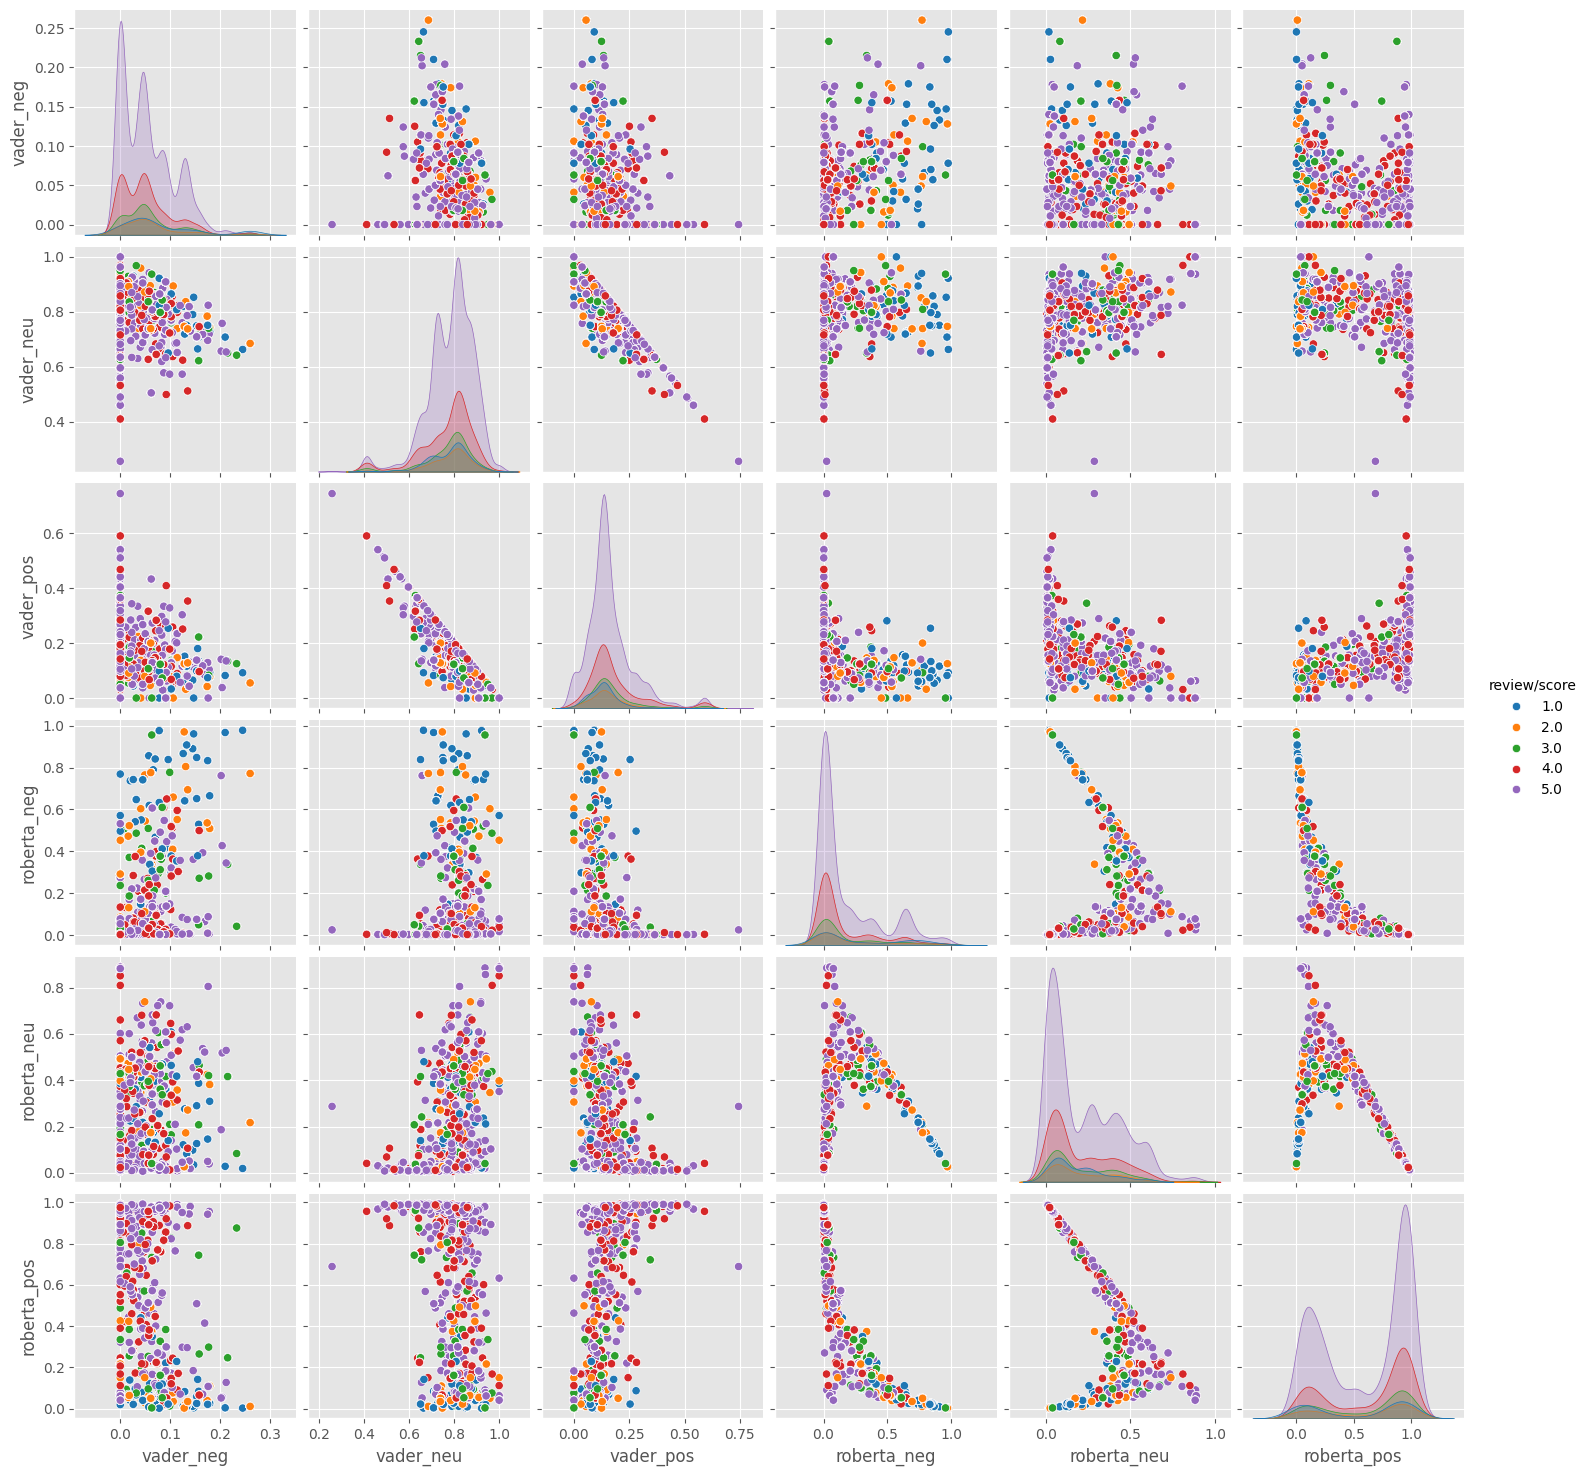

In [38]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='review/score',
            palette='tab10')
plt.show()

In [39]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Title', 'Price',
       'User_id', 'profileName', 'review/helpfulness', 'review/score',
       'review/time', 'review/summary', 'review/text'],
      dtype='object')

In [40]:
results_df = results_df.rename(columns={'review/score':'score', 'review/text': 'text'} )

In [41]:
results_df.query('score == 1') \
    .sort_values('roberta_pos', ascending=False)['text'].values[0]

'I had to purchase this book for a community college class I\'m taking. As a "textbook," it has been a complete disappointment. The "science" is sketchy, the research is shoddy, and the huge holes in logic are brushed over with explanations like "you can\'t prove nearly anything empirically in education" (straight from page 8!). Some of the concepts presented are interesting, but since Mr. Jensen (no, he doesn\'t hold a doctorate) provides almost no citations for his claims, there is no way to check his assertions or determine where the theories come from. The book reads like a multilevel marketing sales pitch. In fact, you are encouraged to share it with your friends and colleagues and are directed to a website where you could empty your bank account getting "certified" in Mr. Jensen\'s unique, "empirically unproven" techniques.'

In [42]:
results_df.query('score == 1') \
    .sort_values('vader_pos', ascending=False)['text'].values[0]

"I listened to the audio version of &quot;Cruel &amp; Unusual&quot; on a recent trip to New Jersey and back. The first 2/3 of the book kept me on the edge of my seat, then... the whole thing collapsed in a heap at the end. Would have been much better if the author had stuck to writing a taut thriller instead of trying to drag in everything from evil Republican office holders to Nazi war criminals, all dumped into the mix at the last possible moment. After all the buildup, the &quot;who&quot; of the whodunnit ends up being... nobody in particular. And the fate of the evildoer? Nothin' much. Disappointing. Won't bother with Dr. Scarpetta or Ms. Cornwall again.I'm a little baffled by all the reviews that say, &quot;great book, bad ending...&quot; and still give it 3 stars or more. Isn't a mystery DEFINED by the ending, by how the author ties up all the loose ends and red herrings?"

In [43]:
results_df.query('score == 5') \
    .sort_values('roberta_neg', ascending=False)['text'].values[0]

"I was introduced to this book when I was a teenager. I loved it then, and was pleasantly surprised to see it still available. Reading it again to my own children, it was better than I remembered, and loved by all of them, from ages 6 to 14. Although at times the heroine is presented as almost too good to be true, the plot of the book is exciting, and left my children asking me to read one more chapter. The setting of the book provides a great amount of historical detail, leaving the reader with an excellent understanding of the Israelites' constant fear of raiding and invasion by the Assyrians, and a good grasp of daily life in Assyria. The book takes a few unexpected twists and turns, and has enough unanswered questions throughout to keep readers of all ages interested. All in all, a very good choice to help understand this time period."

In [44]:
results_df.query('score == 5') \
    .sort_values('vader_neg', ascending=False)['text'].values[0]

"Jack Higgins a.k.a Granny's favourite.His world war 2 novels were very well written, with good plots. However, these latest Higgins novels lack something which the early Higgins novels had in abdance. They were obviously written by a person with a high command of the English language.His latest books have been somewhat lacluster in the way they are written. He seems to have cast aside the need to write well in favour of high powered plots.Lucky for him it works. Many authors couldn't get away with letting their writing get slack. But with Higgins, we just don't seem to care. And Why? Because his plots are so damn good. He writes to a very old formula of action novels. There is a flawed but brilliant hero, and a girl, and a formidable enemy. throw in different world location, lots of guns, lots of fighting, and simmer for 15 minutes. It is a very simple formua, and one which he never strays from. SOme people criticise him because they believe this shows a lack of depth and range. In so

In [45]:
results_df

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Title,Price,User_id,profileName,review/helpfulness,score,review/time,review/summary,text
0,1882931173,0.013,0.781,0.206,0.9408,0.029946,0.285658,0.684396,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,0.055,0.785,0.161,0.9802,0.019585,0.164105,0.816310,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,0.055,0.785,0.161,0.9802,0.019585,0.164105,0.816310,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,0.055,0.785,0.161,0.9802,0.019585,0.164105,0.816310,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,0.055,0.785,0.161,0.9802,0.019585,0.164105,0.816310,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0553344021,0.153,0.709,0.138,-0.6908,0.074707,0.416616,0.508678,Lifetimes: The Beautiful Way to Explain Death ...,10.08,NaN,NaN,22/23,5.0,877046400,How can you heal a grieving child's loss?,Lifetimes is a gently beautiful introduction t...
4996,0553344021,0.153,0.709,0.138,-0.6908,0.074707,0.416616,0.508678,Lifetimes: The Beautiful Way to Explain Death ...,10.08,A3Q0IZXCRTDR8Q,Niki Barron,23/25,5.0,948499200,We Love It!,This book is wonderful for small children. I p...
4997,0553344021,0.153,0.709,0.138,-0.6908,0.074707,0.416616,0.508678,Lifetimes: The Beautiful Way to Explain Death ...,10.08,A3A3S5JX10W6YW,"Craig Dickson ""Independent Software Consultant""",10/10,3.0,1273708800,"Very gentle introduction, but awkward at times",I looked around for a book to help my wife and...
4998,0553344021,0.153,0.709,0.138,-0.6908,0.074707,0.416616,0.508678,Lifetimes: The Beautiful Way to Explain Death ...,10.08,A30J7WQV0ZNRXG,"D. Reinstein ""marindavid""",10/10,5.0,1158105600,A Good Introduction For Youngsters To The Real...,"Knowing and working with many young children, ..."


In [46]:
results_df['sentiment'] = results_df[['roberta_neg', 'roberta_pos', 'roberta_neu']].idxmax(axis=1)

In [47]:
grouped2 = results_df.groupby('sentiment').size().reset_index(name='count')

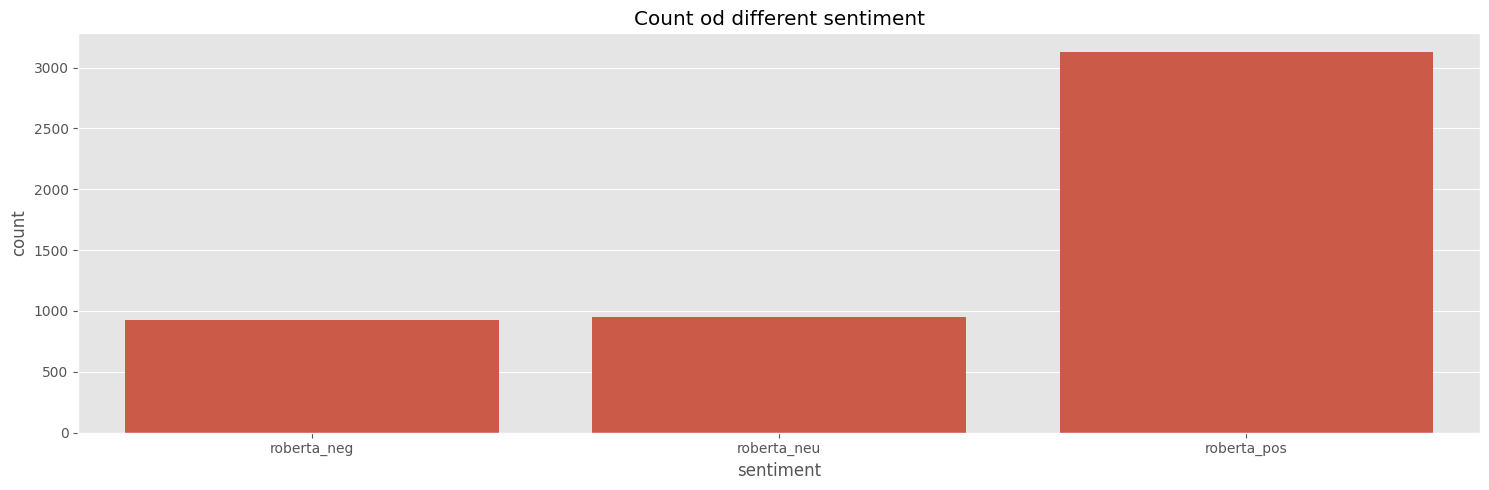

In [48]:
plt.figure(figsize=(15,5))
sns.barplot(data=grouped2, x='sentiment', y='count')
plt.title('Count od different sentiment')
plt.tight_layout()